In [1]:
# Import essential libraries
import numpy as np
import json
import os
import pickle
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [15]:
# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "BackwardsPassExperimentDataSourceFinal.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)
with open(file_path, 'r') as f:
    data = json.load(f)
data[0].keys()

dict_keys(['Name', 'Iteration', 'Class', 'PositionsPerHiddenLayer', 'TotalDistancesToEachother', 'TotalDistancesAllToEachother'])

In [16]:
data_source= "All"
#data2 = [data[i] for i in range(len(data)) if data[i]["Name"]==data_source]
data2 = data.copy()
for i in range(len(data2)):
    data2[i]["TotalDistancesToEachother"]=data2[i]["TotalDistancesToEachother"][1]
    data2[i]["TotalDistancesAllToEachother"]=data2[i]["TotalDistancesAllToEachother"][1]

In [17]:
df = pd.DataFrame(data2)
df_melt = df.melt(id_vars="Name", value_vars=["TotalDistancesToEachother", "TotalDistancesAllToEachother"], var_name="Type", value_name="Average Distance")

In [5]:
df_melt

,Name,Type,Average Distance
0,output,TotalDistancesToEachother,1.947093
1,output,TotalDistancesToEachother,2.120615
2,output,TotalDistancesToEachother,2.095192
3,output,TotalDistancesToEachother,1.819803
4,output,TotalDistancesToEachother,1.801355
...,...,...,...
3195,subset_activations,TotalDistancesAllToEachother,2.579921
3196,subset_activations,TotalDistancesAllToEachother,2.579921
3197,subset_activations,TotalDistancesAllToEachother,2.579921
3198,subset_activations,TotalDistancesAllToEachother,2.579921


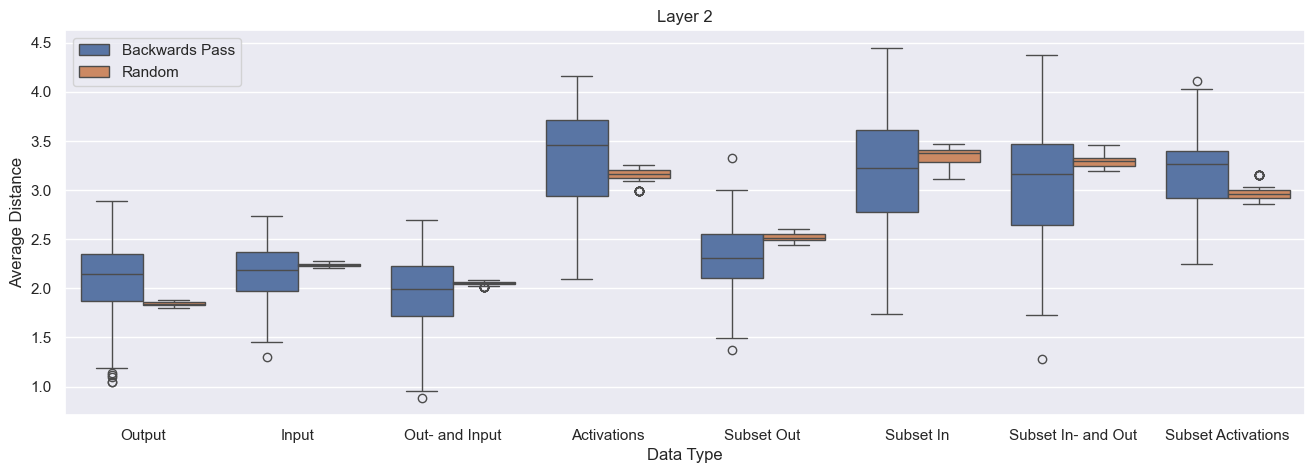

In [18]:
sns.set(rc={"figure.figsize":(16, 5)}) #width=3, #height=4
ax = sns.boxplot(data = df_melt,
                x = 'Name',
                y = 'Average Distance',
            hue = "Type")
ax.set_xlabel('Data Type')
ax.set_ylabel('Average Distance')
#ax.legend(title='Measurement', labels=['Backwards Pass', 'Random'])
handles, labels = ax.get_legend_handles_labels()
idx = np.sort(np.unique(np.array(labels), return_index=True)[1])
ax.legend(np.array(handles)[idx], ["Backwards Pass", "Random"])

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7],["Output", "Input", "Out- and Input", "Activations", "Subset Out", "Subset In", "Subset In- and Out", "Subset Activations"])
plt.title("Layer 2")
plt.show()

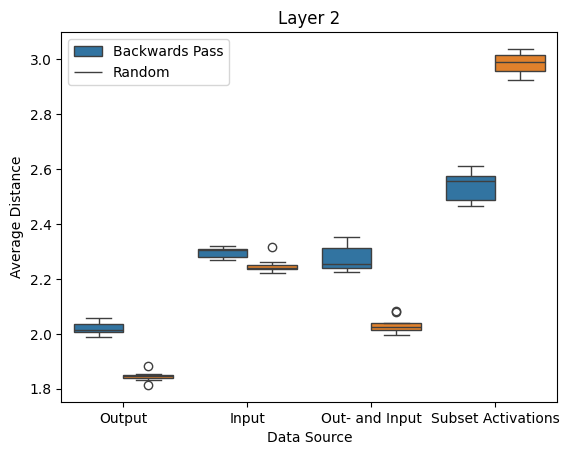

In [120]:
ax = sns.boxplot(data = df_melt,
                x = 'Name',
                y = 'value',
            hue = "column")
ax.set_xlabel('Data Source')
ax.set_ylabel('Average Distance')
#ax.legend(title='Measurement', labels=['Backwards Pass', 'Random'])
plt.legend(labels=['Backwards Pass', 'Random'])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7],["Output", "Input", "Out- and Input", "Subset Activations"])
plt.title("Layer 2")
plt.show()

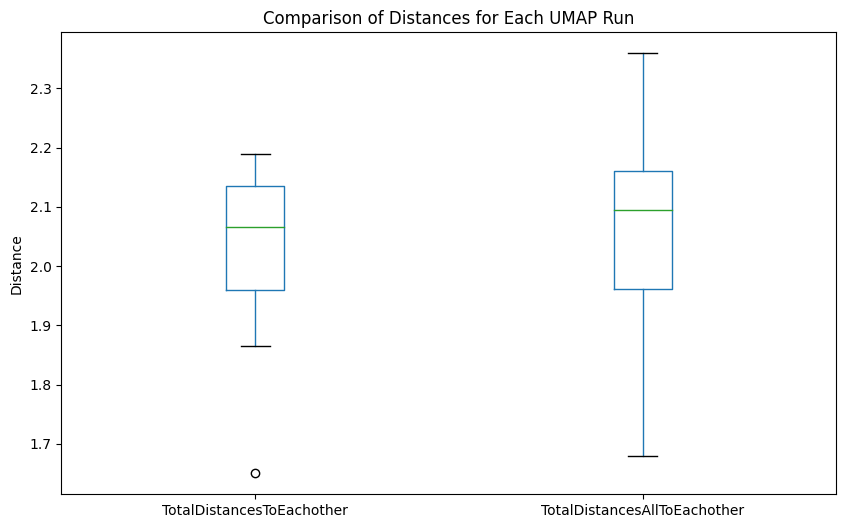

In [27]:
distances_to_eachother = [output[i]["TotalDistancesToEachother"][0] for i in range(len(output))]
distances_all_to_eachother = [output[i]["TotalDistancesAllToEachother"][0] for i in range(len(output))]

# Create a DataFrame
df = pd.DataFrame({
    'TotalDistancesToEachother': distances_to_eachother,
    'TotalDistancesAllToEachother': distances_all_to_eachother
})

# Create side-by-side boxplots
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column=['TotalDistancesToEachother', 'TotalDistancesAllToEachother'], ax=ax, grid=False)
ax.set_ylabel('Distance')
ax.set_title('Comparison of Distances for Each UMAP Run')

# Show the plot
plt.show()

In [39]:
combined_random_dist = [item for sublist in data['RandomDistances'] for item in sublist]

In [53]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def Average(lst):
    return sum(lst) / len(lst)

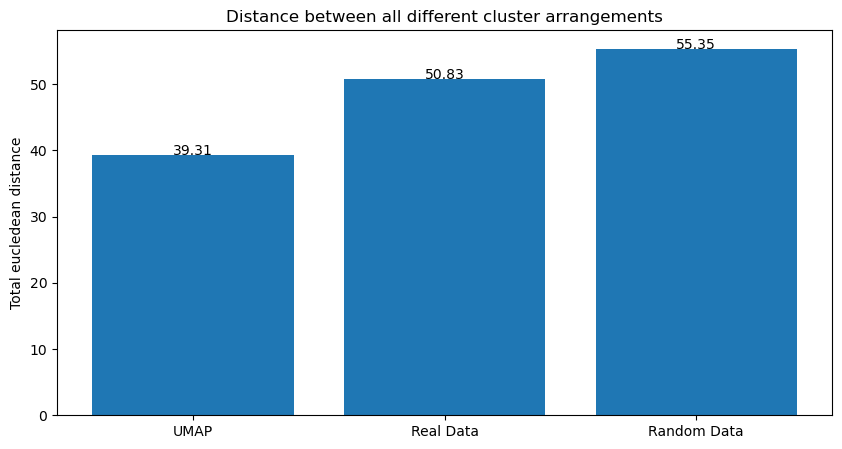

In [56]:
plt.figure(figsize = (10, 5))

name = ["UMAP", "Real Data", "Random Data"]
vals = [round(data["AverageUMAPDistance"],2), round(data["AverageRealDistance"],2), round(Average(data["AverageRandomDistance"]), 2)]


plt.bar(name, vals)
addlabels(name, vals)

plt.title('Distance between all different cluster arrangements')

plt.ylabel('Total eucledean distance')
#plt.xlabel('Data Origin')

plt.show()

/var/folders/_b/s54cb5212b3gmft7v5cqy2p40000gn/T/ipykernel_73828/3368694242.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(names)


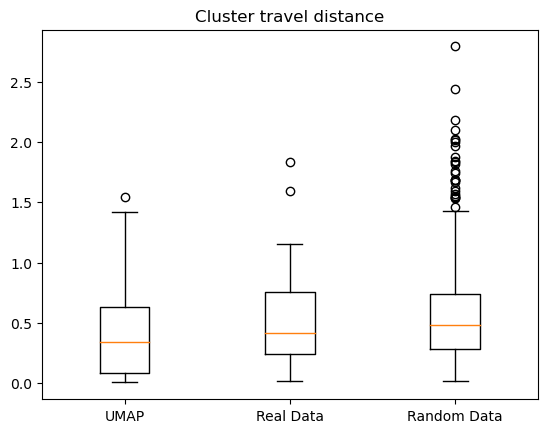

In [40]:
fig1, ax1 = plt.subplots()
names = ["UMAP", "Real Data", "Random Data"]
ax1.set_title('Cluster travel distance')
ax1.set_xticklabels(names)
ax1.boxplot([data["UMAPDistances"], data["RealDistances"], combined_random_dist])

plt.show()

In [57]:
# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "cluster_distances_multiple_umap_runs.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

with open(file_path, 'r') as f:
    data2 = json.load(f)

In [77]:
umap_total_distances = [item["TotalUMAPDistance"] for item in data2]
real_total_distances = [item["TotalRealDistance"] for item in data2]
random_avg_total_distances = [Average(item["TotalRandomDistance"]) for item in data2]

/var/folders/_b/s54cb5212b3gmft7v5cqy2p40000gn/T/ipykernel_73828/2526587363.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(names)


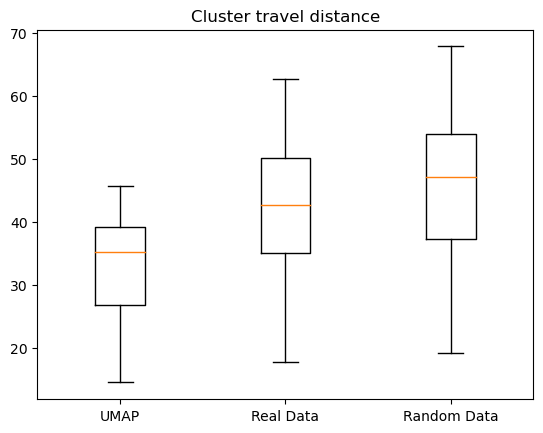

In [88]:
fig2, ax2 = plt.subplots()
names = ["UMAP", "Real Data", "Random Data"]
ax2.set_title('Cluster travel distance')
ax2.set_xticklabels(names)
ax2.boxplot([umap_total_distances, real_total_distances, random_avg_total_distances])

plt.show()

<AxesSubplot:>

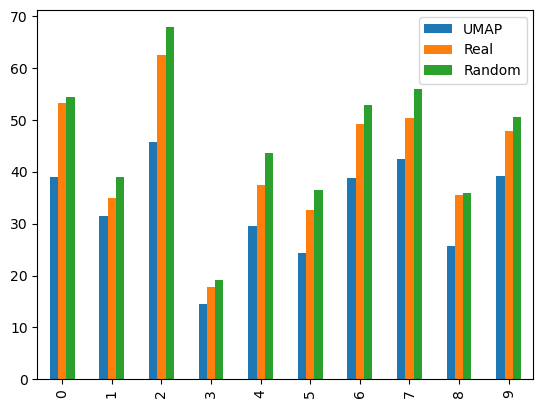

In [91]:
#Add visualization for each UMAP Run
df=pd.DataFrame({'UMAP':umap_total_distances, 'Real':real_total_distances, 'Random':random_avg_total_distances})
df.plot(kind='bar', stacked=False)